In [3]:
# import pandas as pd

# data = pd.read_csv('PWV_processed.csv', low_memory=False)
# print(data.columns.tolist())

Found 36 unique descriptions with data points.
description
improper storage trash                        312235
overfilling of barrel/dumpster                 64269
overgrown weeds on property                    47538
improper storage of trash                      33873
failure to remove snow from sidewalk           33094
illegal dumping                                14710
occupying city property without permit          6974
illegal parking property owner                  6844
unregistered motor vehicles                     4691
failure to maintain dumpster with permit        1794
site cleanliness license                        1159
failure to register                             1096
trash illegally dumped in container              890
removal snow from private property               664
graffiti on building                             611
no number on a building                          544
removal snow from non-residential property       440
failure to secure a re-inspect          

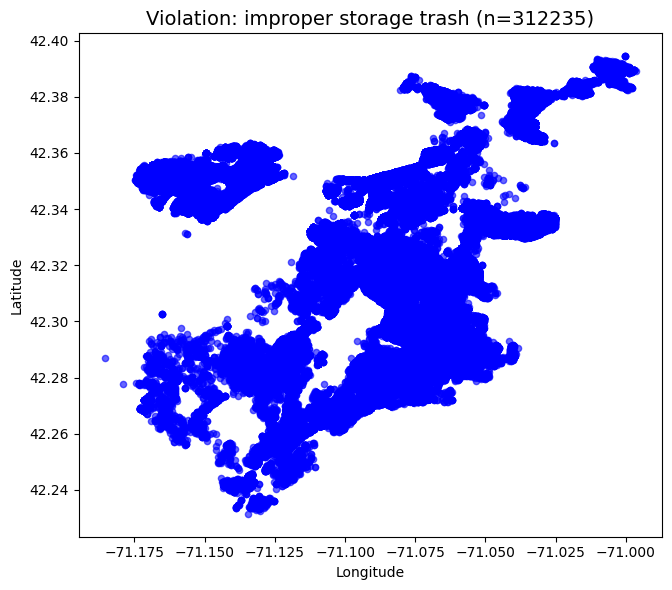

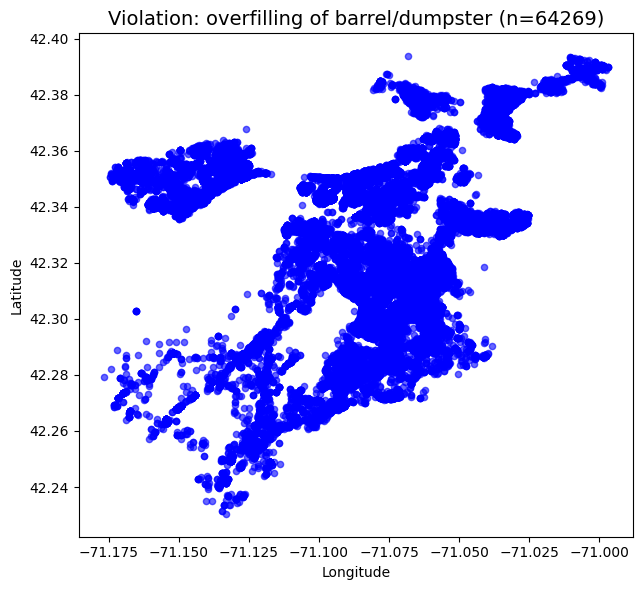

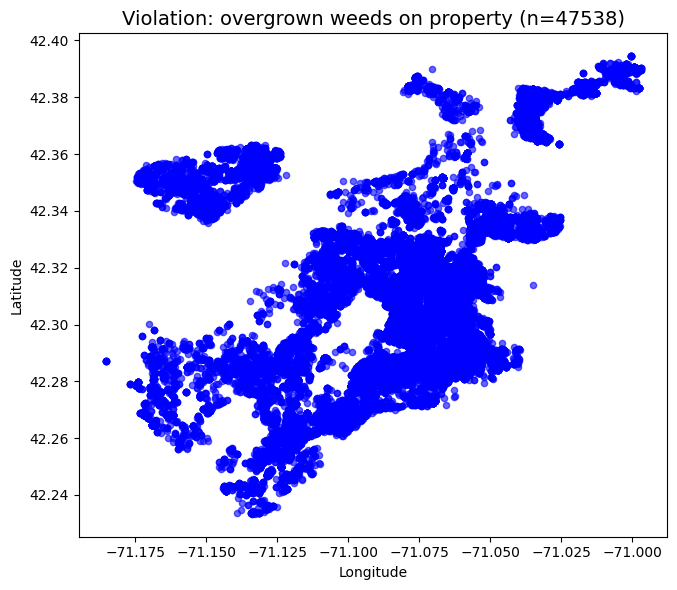

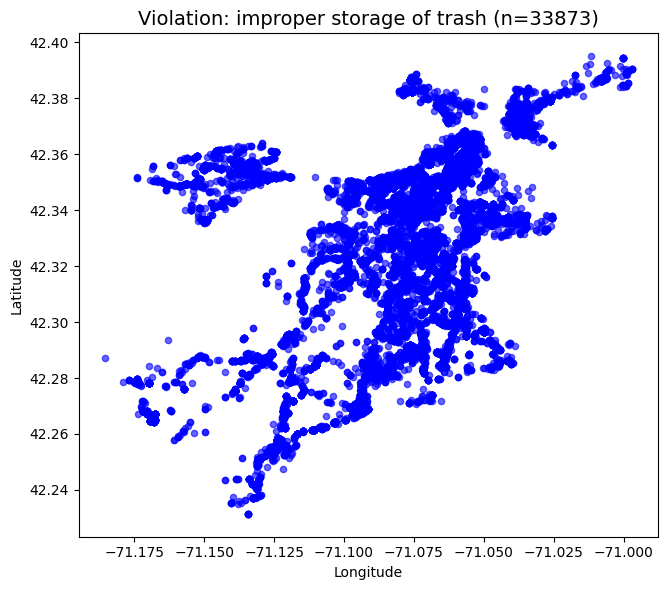

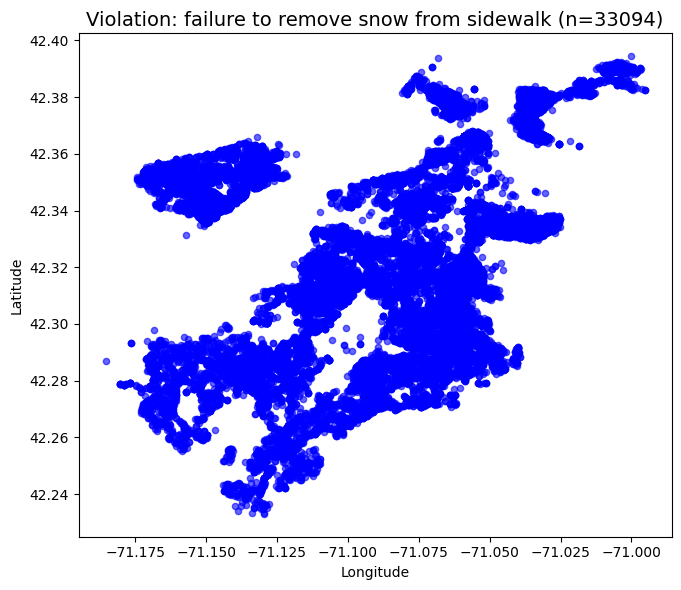

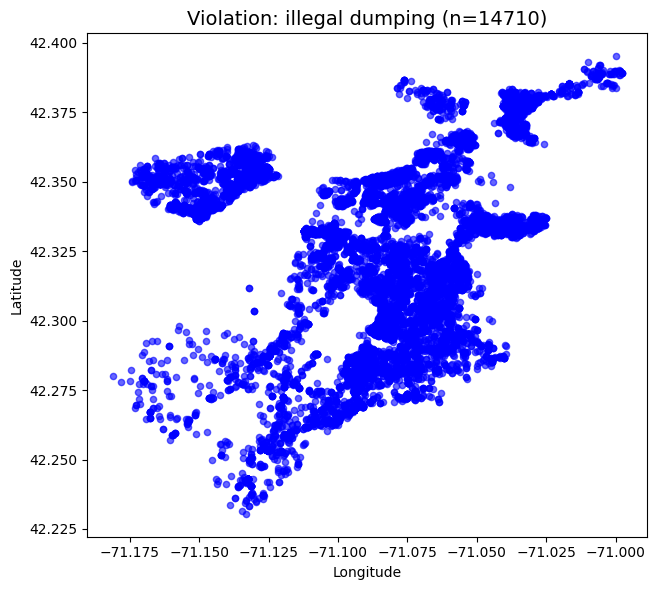

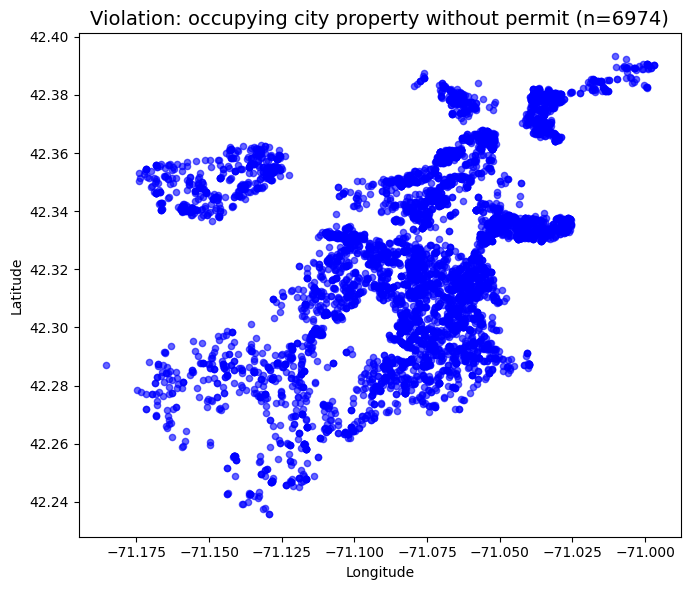

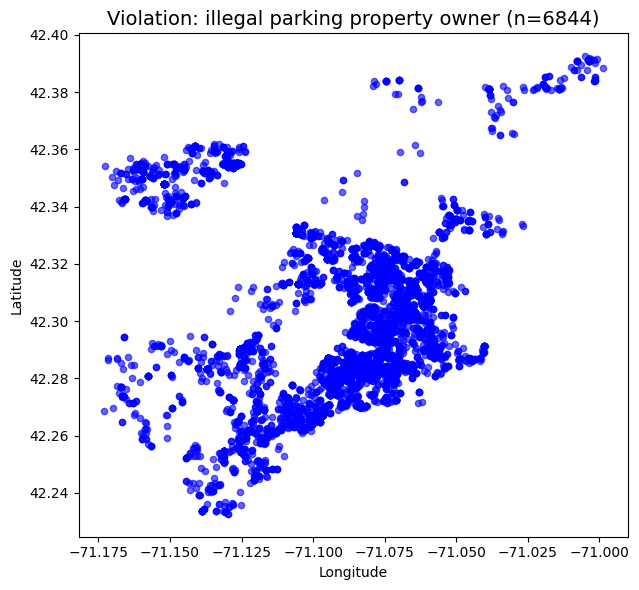

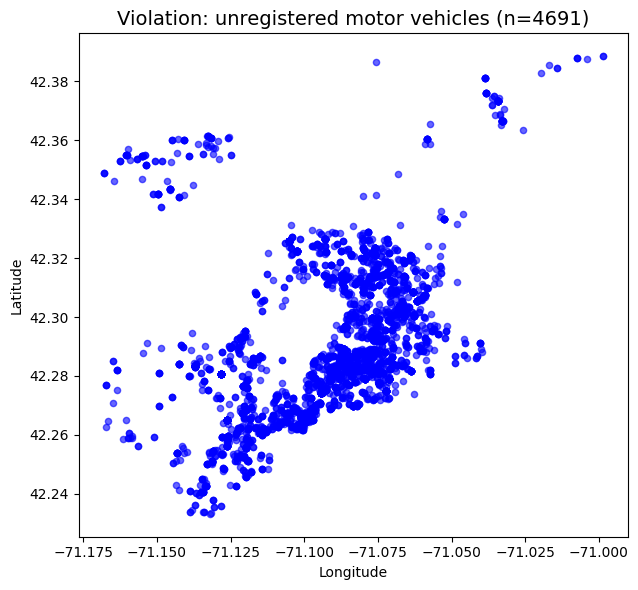

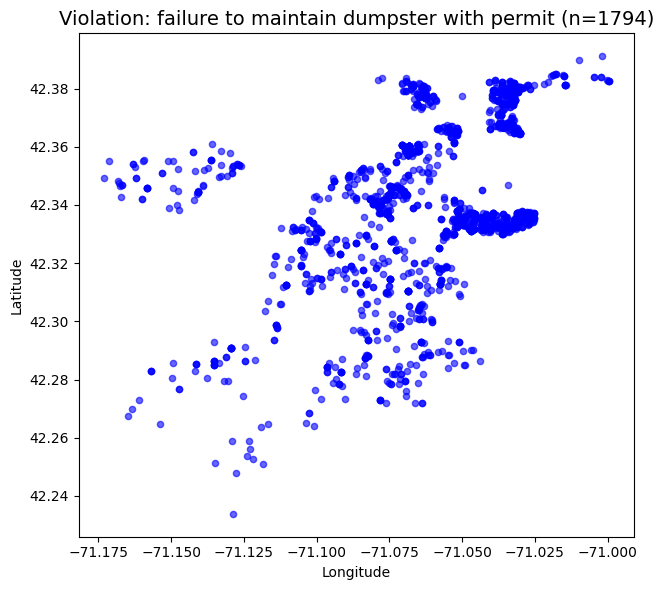

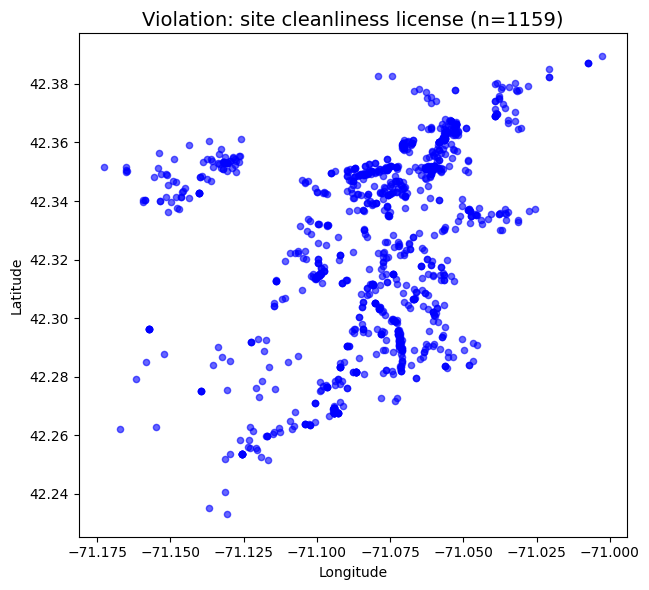

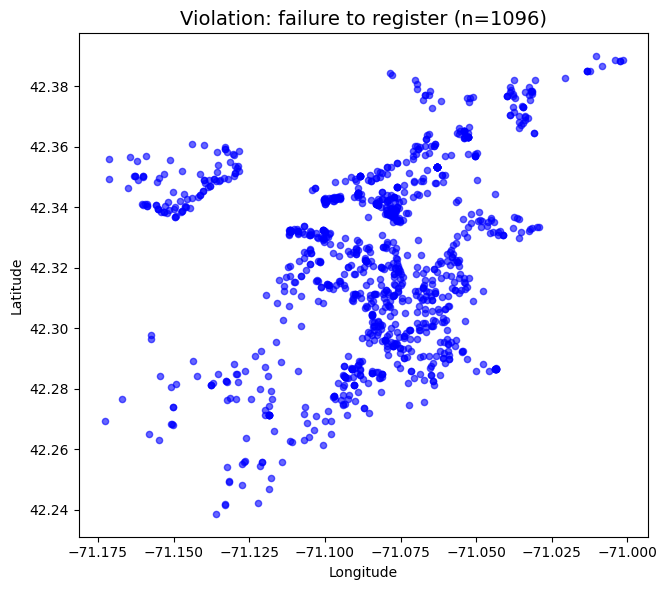

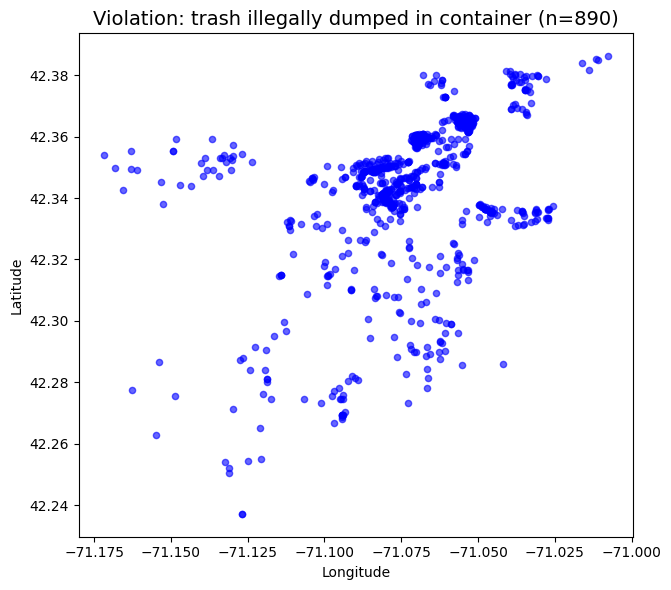

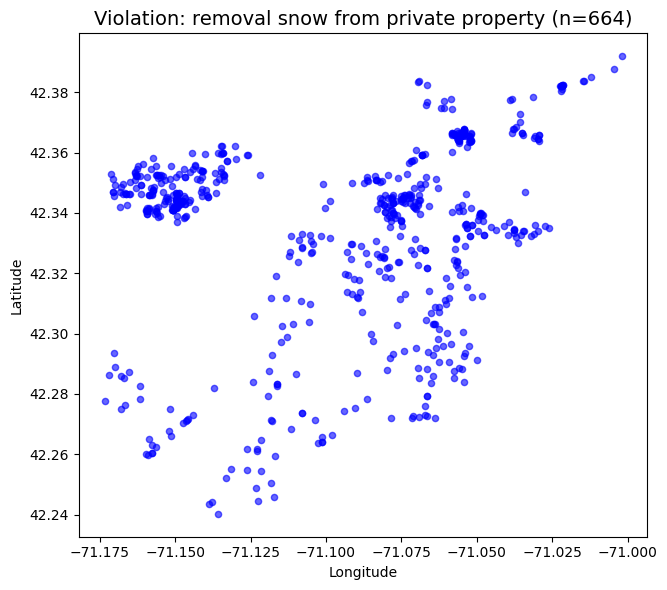

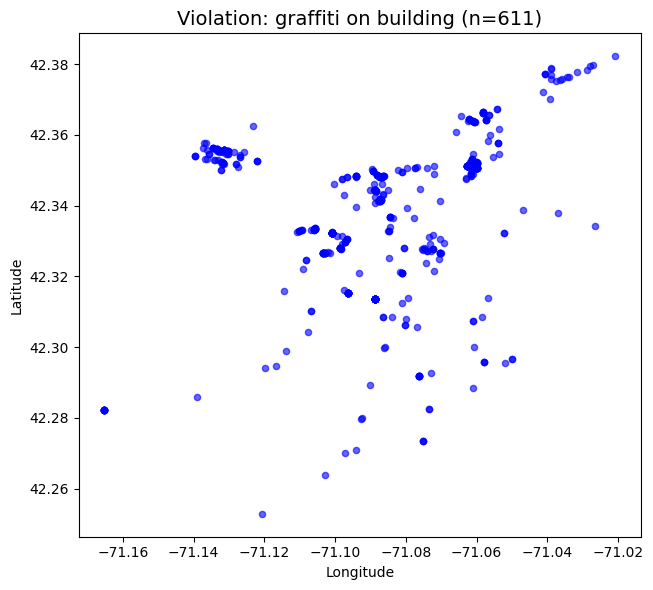

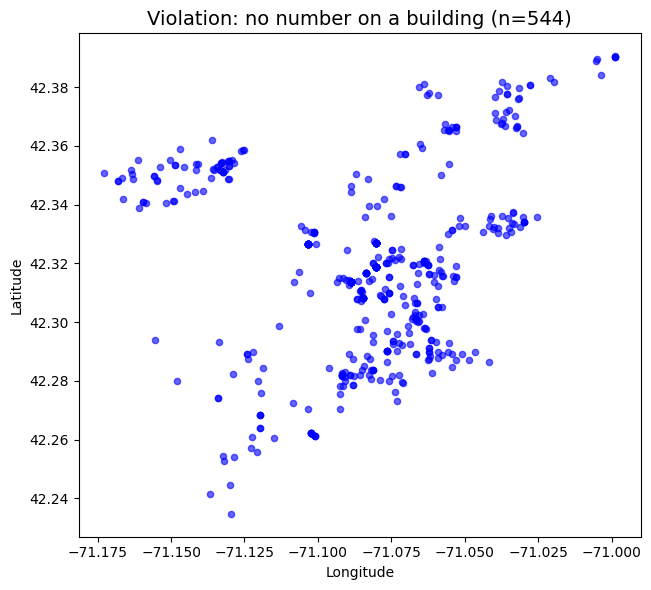

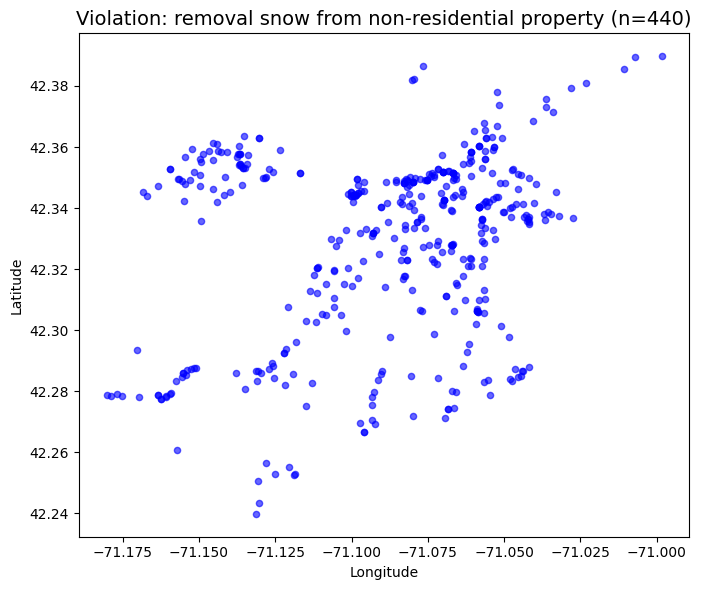

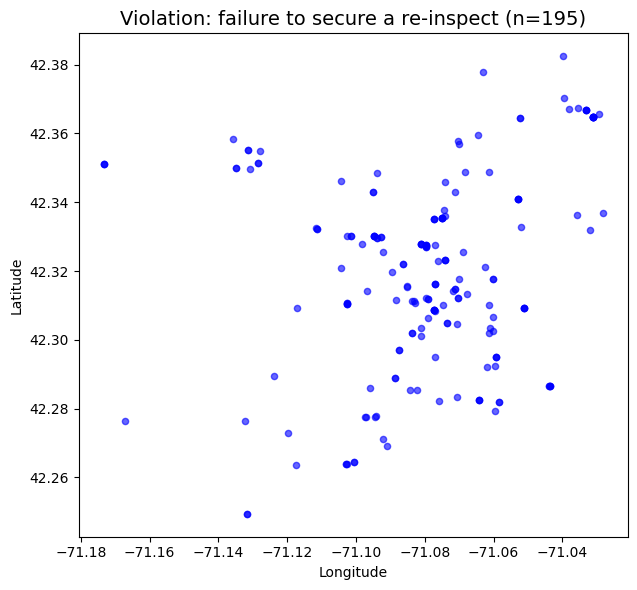

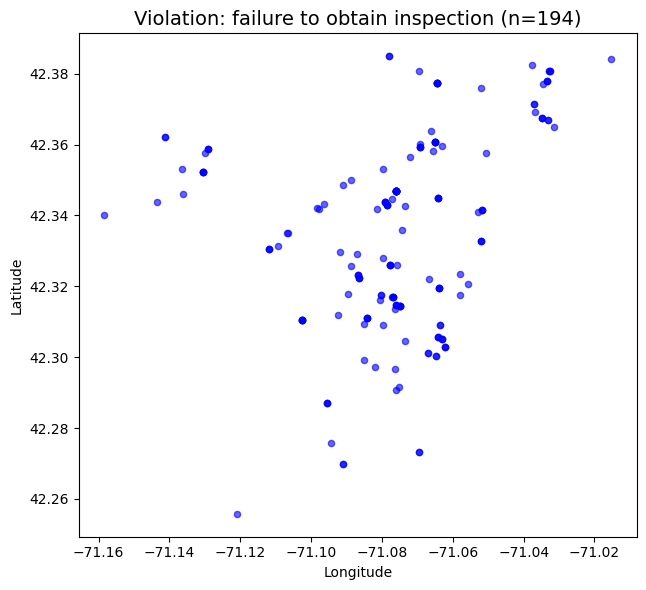

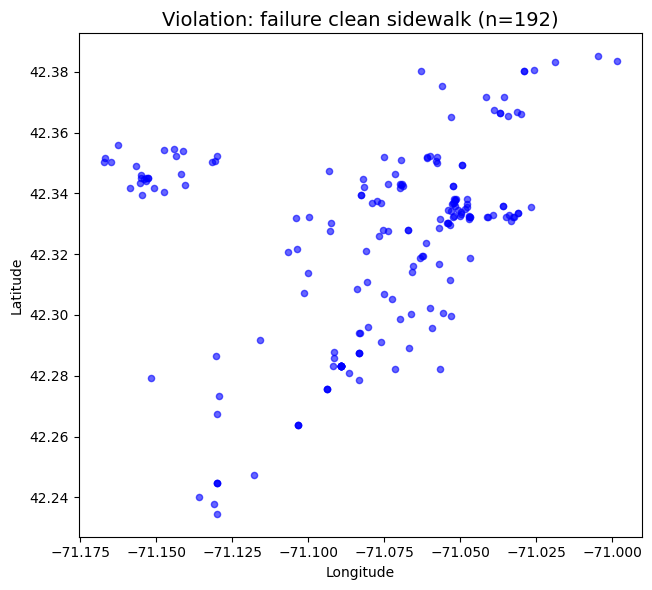

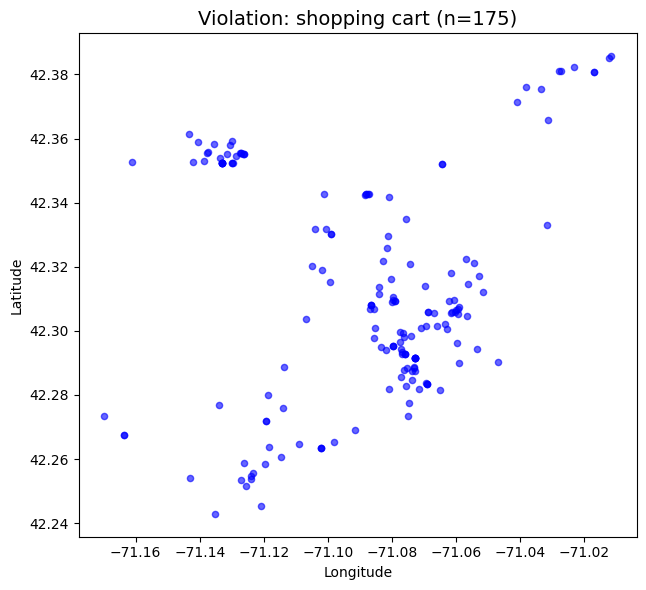

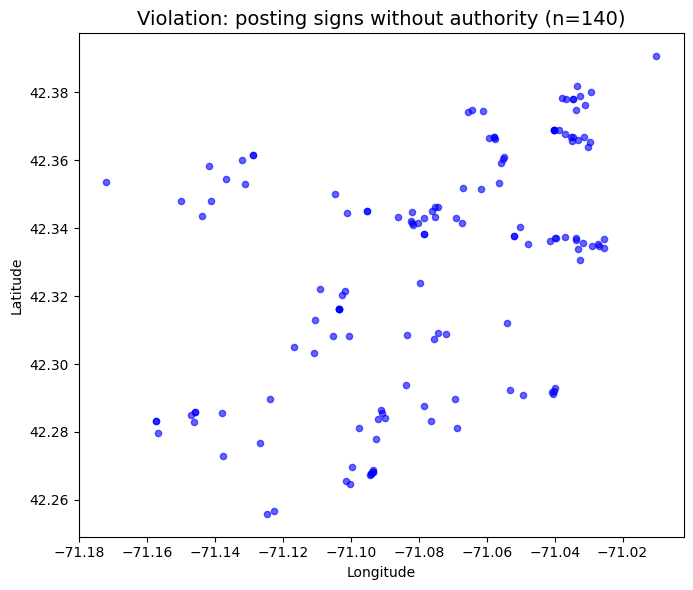

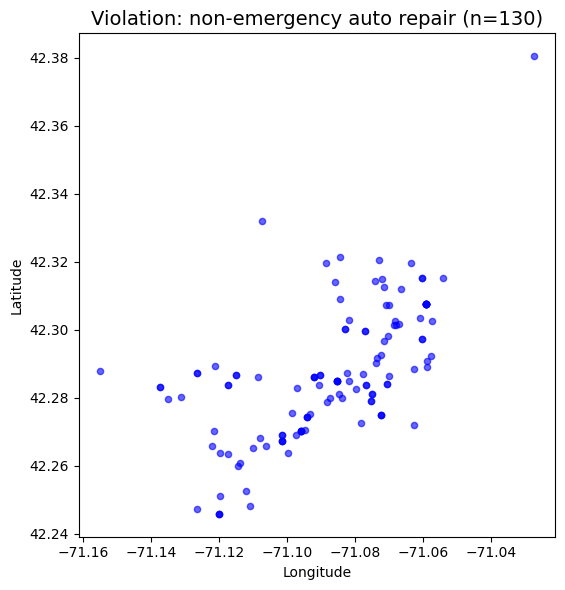

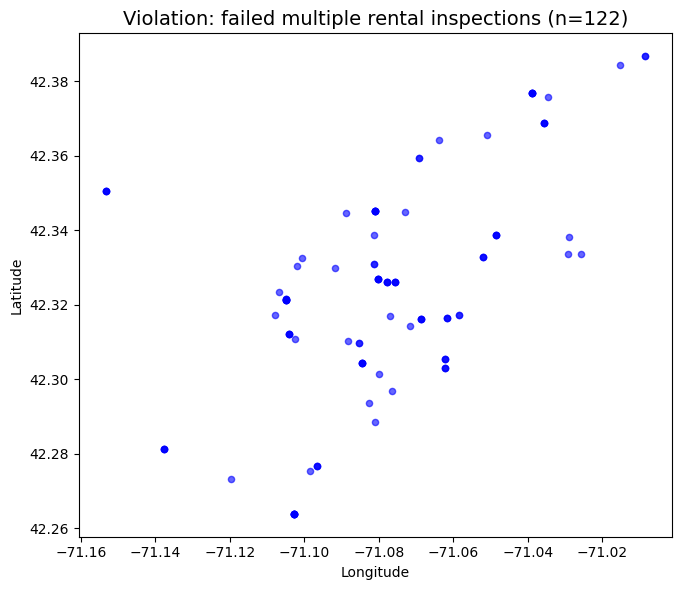

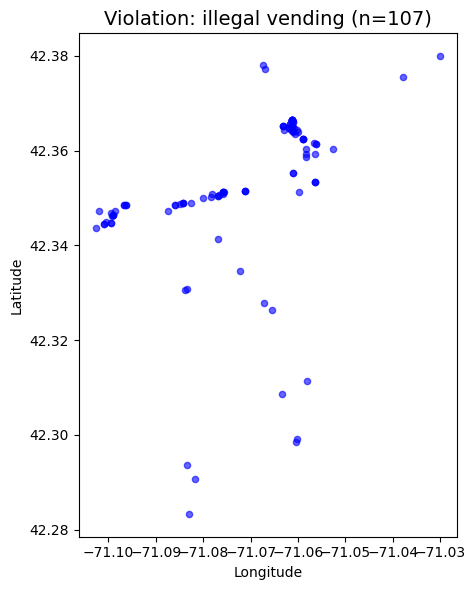

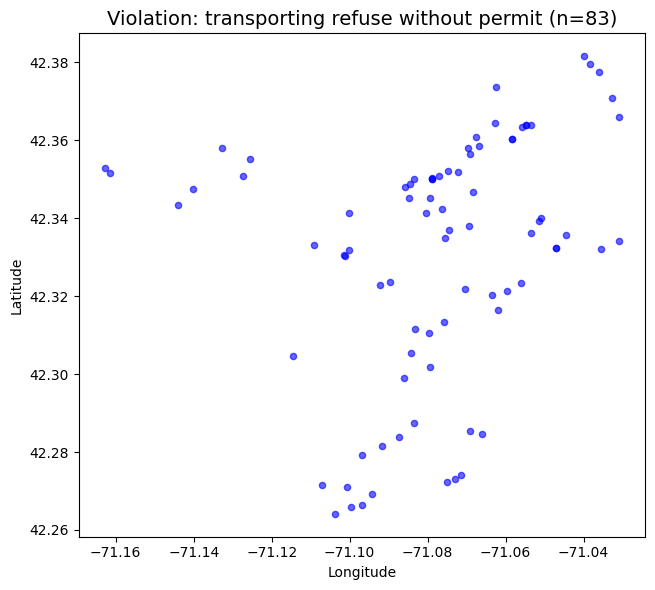

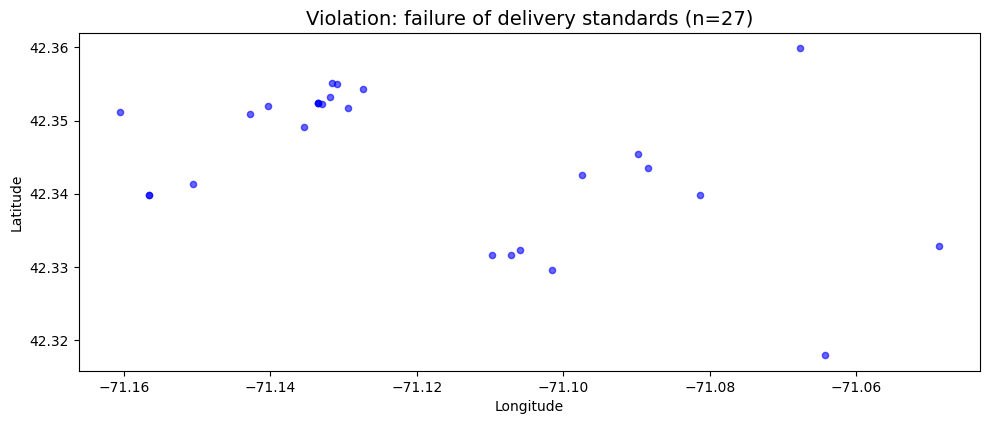

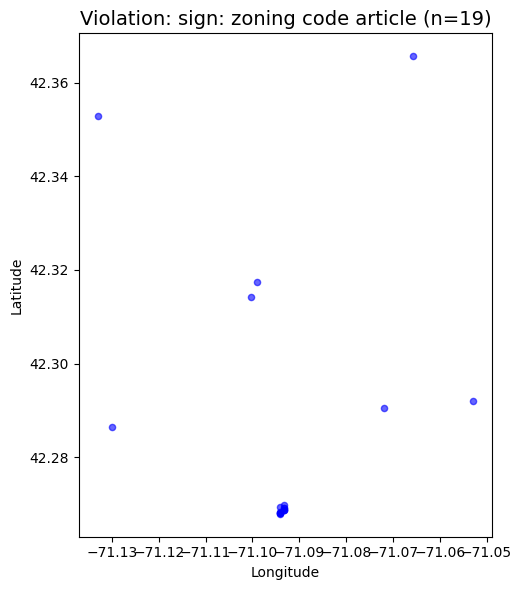

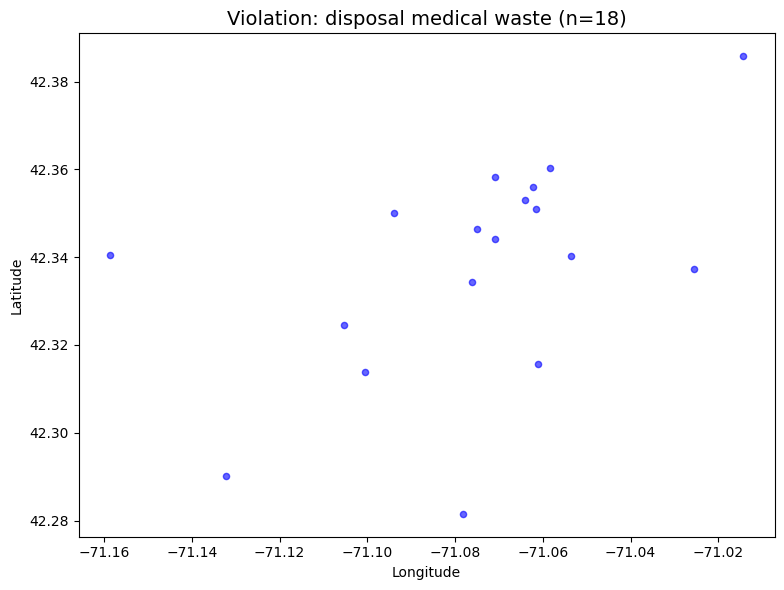

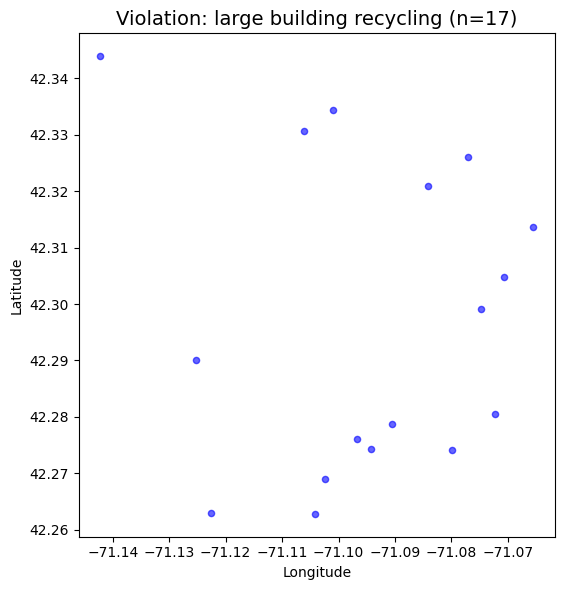

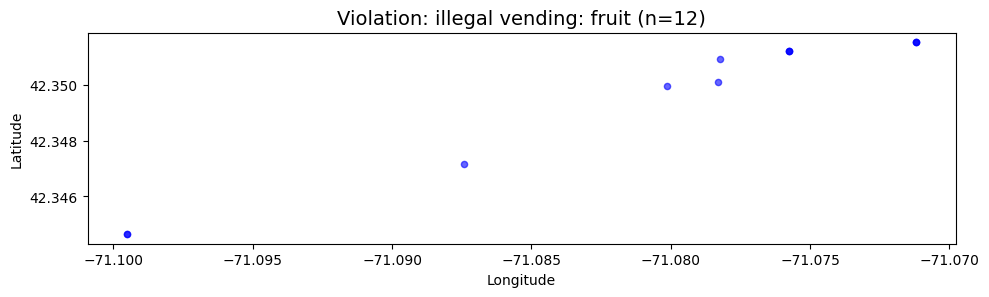

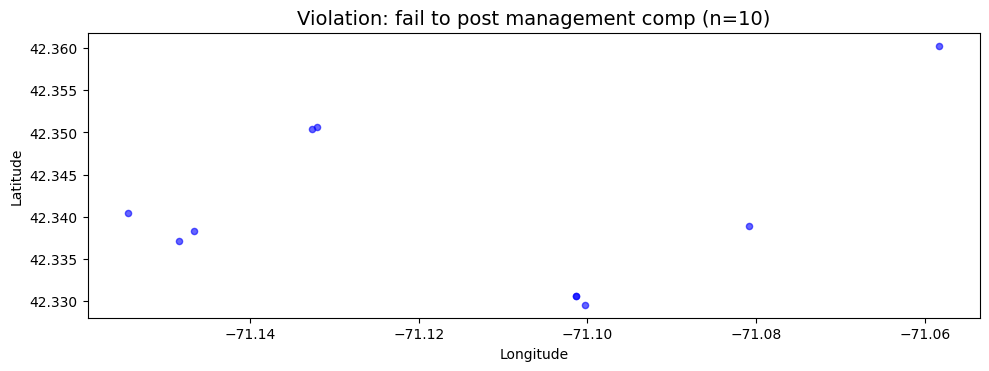

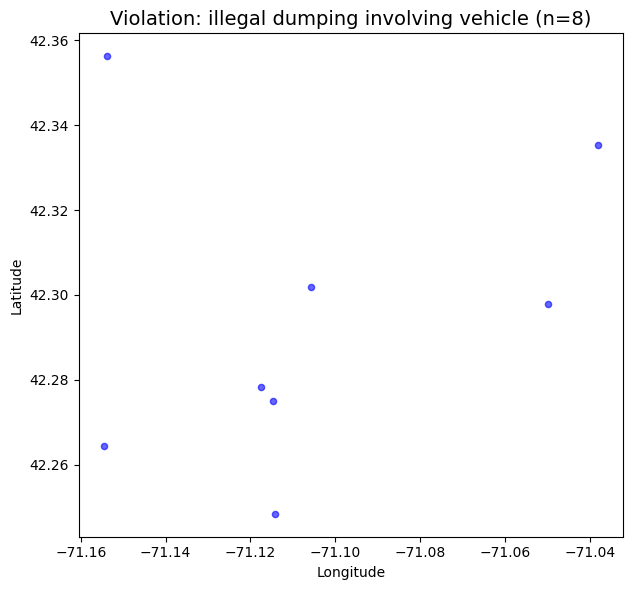

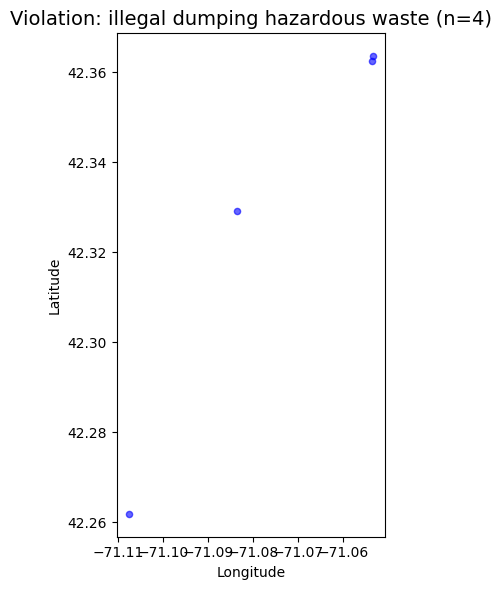

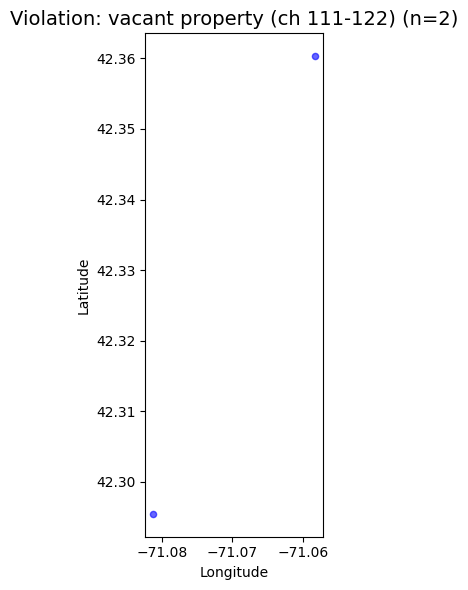

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Load dataset
data = pd.read_csv('PWV_processed.csv', low_memory=False)

# 2. Clean column names
data.columns = data.columns.str.strip().str.lower()

# 3. Normalize relevant columns
if 'description' in data.columns:
    data['description'] = data['description'].astype(str).str.strip()
else:
    raise ValueError("Column 'description' not found. Please check actual column names.")

# 4. Drop rows with missing lat/lon/description
data = data.dropna(subset=['latitude', 'longitude', 'description'])

# 5. Remove outlier coordinates (optional)
data = data[~data['latitude'].between(34, 35)]

# 6. Count how many entries per description
description_counts = data['description'].value_counts()

# Debug: Print number of unique valid descriptions
print(f"Found {len(description_counts)} unique descriptions with data points.")
print(description_counts)

# 7. Plot each violation type (only if it has 2+ points)
for desc, count in description_counts.items():
    if count < 2:
        continue  # skip 1-point clusters

    subset = data[data['description'] == desc]
    gdf = gpd.GeoDataFrame(subset, geometry=gpd.points_from_xy(subset['longitude'], subset['latitude']))

    fig, ax = plt.subplots(figsize=(10, 6))
    gdf.plot(ax=ax, color='blue', alpha=0.6, markersize=20)

    ax.set_title(f"Violation: {desc} (n={count})", fontsize=14)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.tight_layout()
    plt.show()

